In [6]:
import matplotlib.pyplot as plt
import numpy as np
import dataToVar as dat

In [7]:
def r2(y,fit):
    st = sum((y-np.average(y))**2)
    sr = sum((y-fit)**2)
    r2 = 1-sr/st
    return r2

In [8]:
def r2surf(zlist,zlistfit):
    zlist = np.array(zlist)
    zlistfit = np.array(zlistfit)
    st = sum((zlist-np.average(zlist))**2)
    sr = sum((zlist-zlistfit)**2)
    r2 = 1-sr/st
    return r2

eig = dat.c85_noInsert
fif = dat.c50_noInsert
sev = dat.c70_noInsert
thir = dat.c30_noInsert

thirData = thir[2][:20000]
fifData = fif[2][:20000]
sevData = sev[2][:20000]
thirTherm = thir[1][:20000]
fifTherm = fif[1][:20000]
sevTherm = sev[1][:20000]
eigData = eig[2][:20000]
eigTherm = eig[1][:20000]


# print(fif[0][1])

d = 85 - np.average(thirData[-50:])
b = 50 - np.average(fifData[-50:])
c = 70 - np.average(sevData[-50:])
a = 30 - np.average(thirData[-50:])

xx = np.array([30,50,70,85])
yy = np.array([a,b,c,d])
aa,bb,cc = np.polyfit(xx,yy,2)
# plt.plot(xx,yy,'o')
# plt.plot(xx,aa*xx**2+bb*xx+cc)

;
print(r2(yy,aa*xx**2+bb*xx+cc))
print('offset =',aa,'* therm^2 +',bb,'* therm +',cc)
# aa = 0.001783387081181651
# bb = -0.12568814551147064
# cc = 4.697092470876827


0.8991791382513755
offset = 0.03993789862958358 * therm^2 + -3.7238516869045517 * therm + 79.74896963872257


In [9]:
rr = {}
# set = [50,70,90,100]

shortest = min(len(thirData),len(fifData),len(sevData))
ytot = [thirData[:shortest],fifData[:shortest],sevData[:shortest]]
xtot = [thirTherm[:shortest],fifTherm[:shortest],sevTherm[:shortest]]
for i in xtot:
    for j in range(len(i)):
        if str(i[j]) == 'nan':
            i[j] = i[j-1]
zlist = []
for i in ytot:
    for j in i:
        zlist.append(j)

big = np.arange(0.8,1,0.0001)
for i in big:
    zlistfit = []
    for j in range(len(ytot)):
        old = ytot[j][0]
        # ans = []
       

        for k in xtot[j]:
            if str(k) == 'nan':
                print('fix csv')
                break
            else:
                offset = aa*k**2+bb*k+cc
                old = old*i+(k-offset)*(1-i)
                zlistfit.append(old)
        

    r = r2surf(zlist,zlistfit)
    if r >0 and r<1:
        rr[r] = i

# print(rr)
print('r2 =',max(rr)) 
   
trust = rr[max(rr)] 
print('a =',trust)
# trust = .9992

r2 = 0.812420313927263
a = 0.999699999999978


''

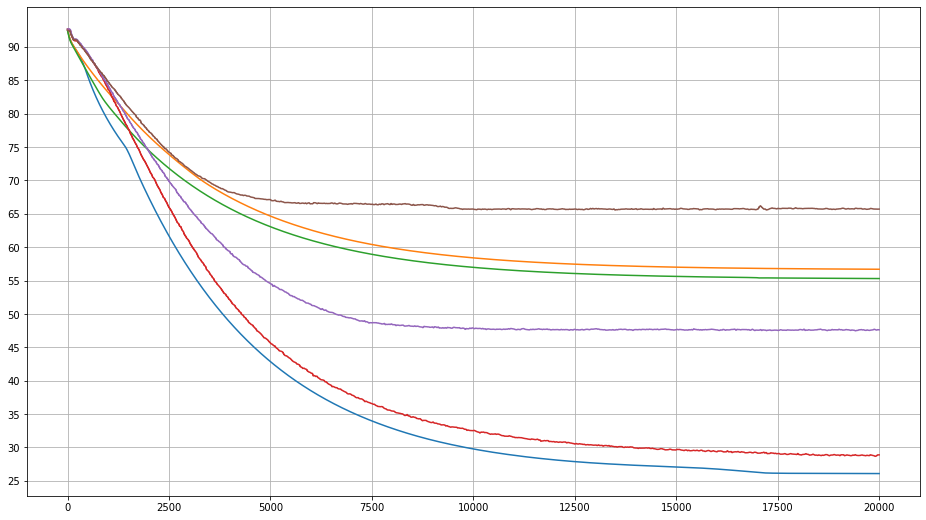

In [10]:
plt.figure(figsize=(16,9))
for j in range(len(ytot)):
    old = ytot[j][0]
    ans = []
 
    for k in xtot[j]:
        offset = aa*k**2+bb*k+cc
        old = old*trust+(k-offset)*(1-trust)
        ans.append(old)
    plt.plot(ans)

for i in ytot:
    plt.plot(i) 
plt.grid()
plt.yticks(np.arange(25,95,5))
;